<a href="https://colab.research.google.com/github/damarismuli/Moringa_Data_Science_Core_W4_Independent_Project_2022_04_Damaris_Muli_Autolib_electric_car_sharing/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_Electric_Car_Usage_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining the Question

a) Specifying the Data Analytic Question

To investigate a claim about the blue cars from the Autolib dataset provided.

In this in mind we can have;
1. Null Hypothesis:The average number of blue cars taken is the same as the average number of cars returned.
2. Alternative Hypothesis:The average number of blue cars taken is different than the average number of blue cars returned.

In this case we'll set our CLAIM to alternative hypothesis.
 

b) Defining the Metric for Success

Being able to determine if the CLAIM is true or false i.e if average number of blue cars taken is different than the average number of blue cars returned or not.


c) Understanding the context

Electric car sharing service company connects individuals to convenient,short rental vehicles.
They differ from car rental companies,including Blue car, Utilib and Utilib 1.4.They are convenient and they are often app based with self technology allowing individuals to check in and out with ease.At times they are physically based or rather they have stations which facilitate pick up and returns of cars.
Stations are specific public names facilitated by an electric sharing service company where picking and returning of the cars take place .
At the stations ,there are counters which serve as agents to different car agencies and customers  can be served from there.

In this project i'll be a data scientist for Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.


d) Recording the Experimental Design

The following steps will be accomplished to solve the question.
1. Find and deal with outliers, anomalies, and missing data within the dataset.
2. Plot appropriate univariate and bivariate summaries recording our observations.
3. Implement the solution by performing hypothesis testing.


e) Data Relevance

We've used open data which has a time frame of january to july 2018.The provided dataset is a daily aggregation, by date and postal code, of the number of events at the Autolib electric car-sharing service company.

Data Exploration

Importing our Libraries

In [ ]:
# Importing the libraries we will usein this project.

# Importing the pandas library

import pandas as pd

# Importing the numpy library

import numpy as np

#Importing seaborn Library
import seaborn as sns

#Importing matplotlib Library

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/DSCoreAutolibDataset
url = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(url)
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


Checking the Data

In [ ]:
# checking the information about the dataset
#
df.info

<bound method DataFrame.info of        Postal code       date  n_daily_data_points  dayOfWeek day_type  \
0            75001   1/1/2018                 1440          0  weekday   
1            75001   1/2/2018                 1438          1  weekday   
2            75001   1/3/2018                 1439          2  weekday   
3            75001   1/4/2018                 1320          3  weekday   
4            75001   1/5/2018                 1440          4  weekday   
...            ...        ...                  ...        ...      ...   
16080        95880  6/15/2018                 1440          4  weekday   
16081        95880  6/16/2018                 1440          5  weekend   
16082        95880  6/17/2018                 1440          6  weekend   
16083        95880  6/18/2018                 1440          0  weekday   
16084        95880  6/19/2018                 1370          1  weekday   

       BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
0        

In [ ]:
# understanding our dataset
#
df.describe

<bound method NDFrame.describe of        Postal code       date  n_daily_data_points  dayOfWeek day_type  \
0            75001   1/1/2018                 1440          0  weekday   
1            75001   1/2/2018                 1438          1  weekday   
2            75001   1/3/2018                 1439          2  weekday   
3            75001   1/4/2018                 1320          3  weekday   
4            75001   1/5/2018                 1440          4  weekday   
...            ...        ...                  ...        ...      ...   
16080        95880  6/15/2018                 1440          4  weekday   
16081        95880  6/16/2018                 1440          5  weekend   
16082        95880  6/17/2018                 1440          6  weekend   
16083        95880  6/18/2018                 1440          0  weekday   
16084        95880  6/19/2018                 1370          1  weekday   

       BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
0      

In [ ]:
# Determining the no. of records in our dataset
#
df.shape

(16085, 13)

In [ ]:
# Previewing the top of our dataset
#
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Previewing the bottom of our dataset
# 
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

Tidying the Dataset

In [ ]:
#dropping unnecessary columns
#
df.drop(['date', 'n_daily_data_points', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'], axis=1, inplace=True)
df

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


In [ ]:
#Dataset preview
df

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


In [ ]:
#checking for null values
#
df.isnull().sum()

Postal code              0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
dtype: int64

In [ ]:
# checking for duplicates
df.duplicated().any()

True

In [ ]:
df.nunique()

Postal code              104
dayOfWeek                  7
day_type                   2
BlueCars_taken_sum       932
BlueCars_returned_sum    929
dtype: int64

Exploratory Data Analysis (EDA)

In [ ]:
df.sample(10)

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
4587,92100,5,weekend,467,459
6900,92260,4,weekday,21,21
7696,92320,2,weekday,59,46
5663,92170,1,weekday,47,51
15563,94800,0,weekday,45,56
13064,94000,2,weekday,83,71
6947,92260,5,weekend,37,39
9079,92410,5,weekend,8,7
14274,94220,0,weekday,38,34
10483,93150,2,weekday,2,0


In [ ]:
# Getting the day type
df2 = df[df.day_type == 'weekend']

In [ ]:
df2.sample(10)

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
912,75006,6,weekend,341,338
11688,93360,6,weekend,19,13
14151,94160,5,weekend,95,96
325,75003,6,weekend,356,359
1126,75008,6,weekend,437,438
607,75004,6,weekend,294,290
15576,94800,6,weekend,80,83
9157,92410,6,weekend,12,9
9021,92400,5,weekend,147,148
14984,94410,6,weekend,32,35


In [ ]:
#In our scenario we'll work on weekends.
#NB 5= Weekday and 6=week end


UNIVARIATE

a) Numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Postal code            16085 non-null  int64 
 1   dayOfWeek              16085 non-null  int64 
 2   day_type               16085 non-null  object
 3   BlueCars_taken_sum     16085 non-null  int64 
 4   BlueCars_returned_sum  16085 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 628.4+ KB


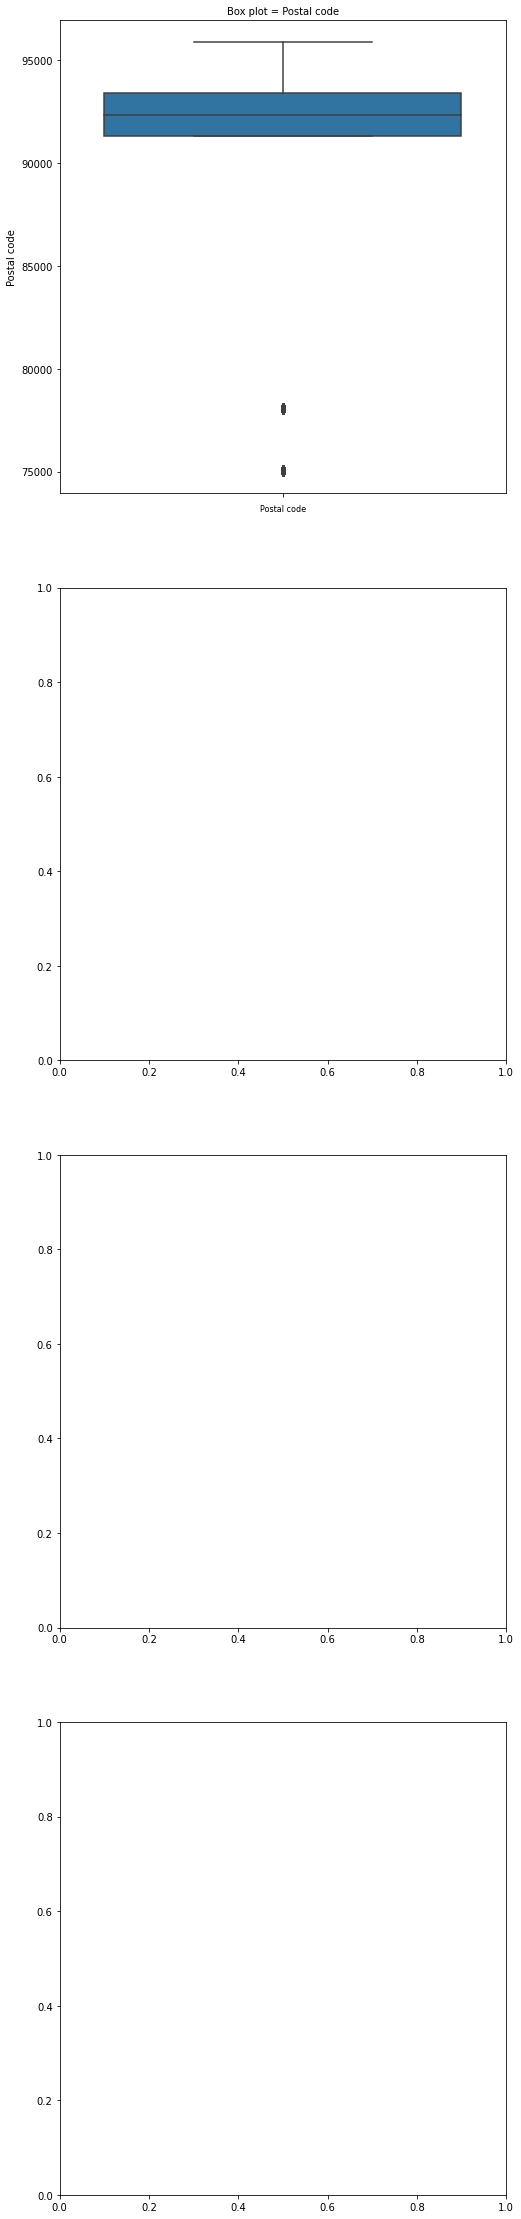

In [ ]:
col_names = ['Postal code','dayOfWeek','BlueCars_taken_sum','BlueCars_returned_sum']
fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = df[col_val], ax= ax[i])
  ax[i].set_title('Box plot = {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize= 8)
  plt.show()
  


  #from the box plot we can see the couple number of outliers

In [ ]:
# Checking for anomalities
#
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df2'
# ---
# 
df2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of df2
# 
print(df2.shape)

# printing the shape of df 
#
print(df.shape)

(12020, 5)
(16085, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df.sample(10)

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
10100,93100,0,weekday,138,135
13517,94120,2,weekday,44,38
211,75002,2,weekday,156,157
3698,78140,2,weekday,29,33
14636,94300,1,weekday,56,50
7048,92270,3,weekday,24,24
9647,92600,1,weekday,187,176
5562,92160,3,weekday,24,22
15307,94700,2,weekday,38,30
11509,93350,4,weekday,10,9


In [ ]:
# get of the type of day 
df2['dayOfWeek'].value_counts(normalize=True)*100

0    14.808652
1    14.717138
2    14.118136
3    14.118136
6    14.118136
4    14.109817
5    14.009983
Name: dayOfWeek, dtype: float64

In [ ]:
# Describing the numerical values
df2[['BlueCars_taken_sum','BlueCars_returned_sum']].describe()

,BlueCars_taken_sum,BlueCars_returned_sum
count,12020.000000,12020.000000
mean,50.772962,50.775707
std,49.901088,49.699869
min,0.000000,0.000000
25%,16.000000,17.000000
50%,34.000000,34.000000
75%,68.000000,68.000000
max,302.000000,306.000000


Text(0.5, 1.0, 'Distribution of Blue Cars Taken')

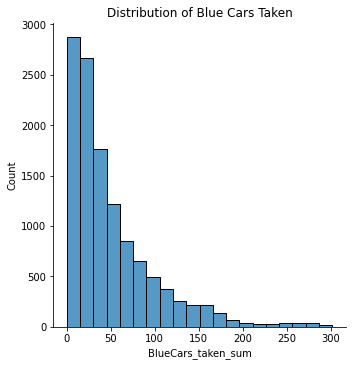

In [ ]:
# Plotting Blue cars that were taken
sns.displot(df2['BlueCars_taken_sum'], bins=20)
plt.title('Distribution of Blue Cars Taken')

Text(0.5, 1.0, 'Distribution of Blue Cars Taken')

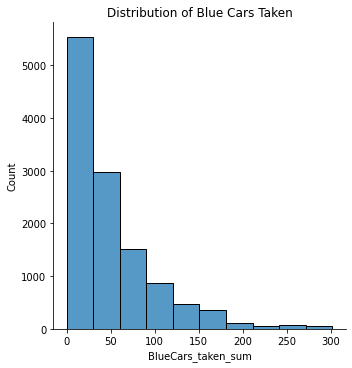

In [ ]:
# Plotting bluecars returned 
sns.displot(df2['BlueCars_taken_sum'], bins=10)
plt.title('Distribution of Blue Cars Taken')


Text(0.5, 1.0, 'Distribution of Blue Cars Returned')

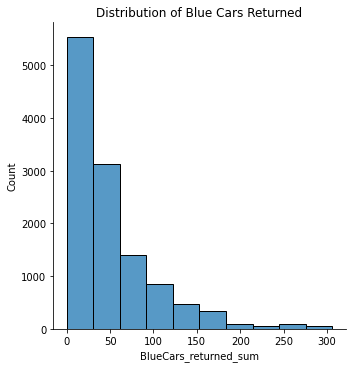

In [ ]:
# Plot bluecars returned 
sns.displot(df2['BlueCars_returned_sum'], bins=10)
plt.title('Distribution of Blue Cars Returned')


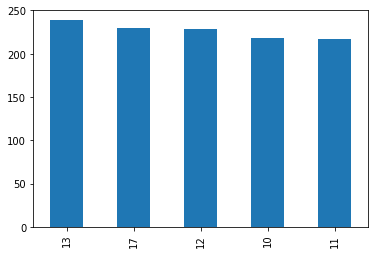

In [ ]:
df2['BlueCars_returned_sum'].value_counts().head().plot.bar()

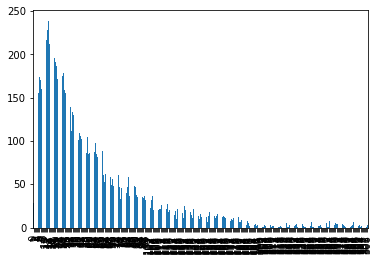

In [ ]:

df2['BlueCars_returned_sum'].value_counts().sort_index().plot.bar()

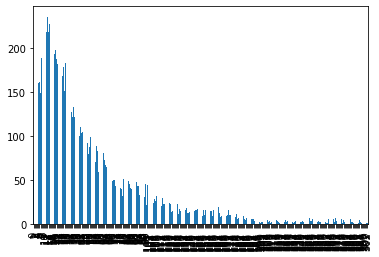

In [ ]:
df2['BlueCars_taken_sum'].value_counts().sort_index().plot.bar()

b) Categorical

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12020 entries, 3899 to 16084
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Postal code            12020 non-null  int64 
 1   dayOfWeek              12020 non-null  int64 
 2   day_type               12020 non-null  object
 3   BlueCars_taken_sum     12020 non-null  int64 
 4   BlueCars_returned_sum  12020 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 563.4+ KB


Text(0.5, 1.0, 'Type of Day')

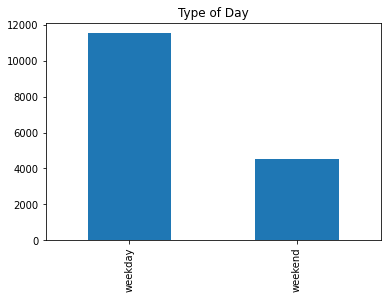

In [ ]:
#Different type of days
df.day_type.value_counts().plot.bar()
plt.title('Type of Day')

In [ ]:
df2

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3902,91330,3,weekday,5,8
3903,91330,4,weekday,10,6
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


In [ ]:
df2['Postal code'] = df2['Postal code'].apply(str)
print(df2.dtypes)

Postal code              object
dayOfWeek                 int64
day_type                 object
BlueCars_taken_sum        int64
BlueCars_returned_sum     int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


BIVALENT ANALYSIS

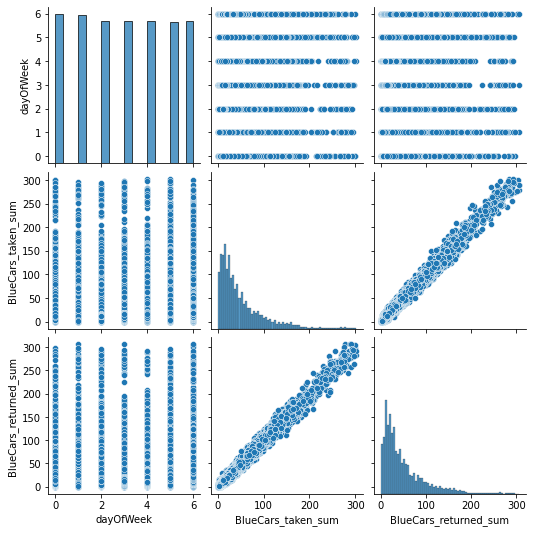

In [ ]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df2)
plt.show()

<Figure size 1440x1080 with 0 Axes>

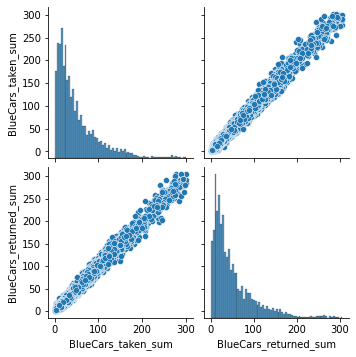

In [ ]:
# Determine correlation between numeric features
plt.figure(figsize=(20,15))
sns.pairplot(df2[['BlueCars_taken_sum','BlueCars_returned_sum']])


In [ ]:
df2['BlueCars_taken_sum'].corr(df2['BlueCars_returned_sum'])

0.9928516249522569

In [ ]:
df

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


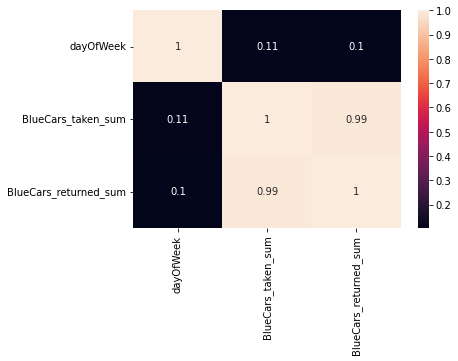

In [ ]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

Implementing The Solution

Hypothesis Testing

In [ ]:
##  Null hypothesis: 
      # the average number of blue cars taken is the same that of the blue cars returned?
##  Alternative hypothesis:  
      # the average number of blue cars taken is different that of the blue cars returned(***CLAIM:***)

In [ ]:
df2.columns

Index(['Postal code', 'dayOfWeek', 'day_type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum'],
      dtype='object')

In [ ]:
df2.dtypes

Postal code              object
dayOfWeek                 int64
day_type                 object
BlueCars_taken_sum        int64
BlueCars_returned_sum     int64
dtype: object

In [ ]:
df2.count()

Postal code              12020
dayOfWeek                12020
day_type                 12020
BlueCars_taken_sum       12020
BlueCars_returned_sum    12020
dtype: int64

In [ ]:
df2.drop(['day_type'], axis=1, inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
3899,91330,0,19,9
3900,91330,1,10,10
3901,91330,2,11,13
3902,91330,3,5,8
3903,91330,4,10,6
...,...,...,...,...
16080,95880,4,15,10
16081,95880,5,19,19
16082,95880,6,33,35
16083,95880,0,11,14


In [ ]:
## NORMALITY TESTS
from scipy.stats import shapiro

def shapiro_test(df2, col_list):
    for x in col_list:
        print(x)
        data = df2[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print('\n')

In [ ]:
# shapiro Wilk's test
shapiro_test(df2, list(df2.columns))

Postal code
Statistics=0.925, p=0.000
Sample does not look Gaussian (reject H0)


dayOfWeek
Statistics=0.917, p=0.000
Sample does not look Gaussian (reject H0)


BlueCars_taken_sum
Statistics=0.808, p=0.000
Sample does not look Gaussian (reject H0)


BlueCars_returned_sum
Statistics=0.807, p=0.000
Sample does not look Gaussian (reject H0)




/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
import scipy.stats as stats

Stratisfied Sampling

In [ ]:
# Stratified sample
df3 = df2.groupby('dayOfWeek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df3

,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
7455,92300,0,171,167
10942,93230,0,21,33
9697,92700,0,113,115
14770,94340,0,43,33
7804,92330,0,24,35
...,...,...,...,...
15155,94500,6,37,45
12756,93700,6,59,51
10820,93200,6,28,23
9288,92420,6,19,17


In [ ]:
# population mean of cars taken
pop_mean = df['BlueCars_taken_sum'].mean()
pop_mean

125.92695057506994

In [ ]:
# population mean of cars returned
pop_mean_returned = df['BlueCars_returned_sum'].mean()
pop_mean_returned

125.912713708424

In [ ]:
# sample mean of blue cars taken
sample_mean = df3['BlueCars_taken_sum'].mean()
sample_mean

52.49210307564422

In [ ]:
# sample mean of blue cars taken
returned = df3['BlueCars_returned_sum'].mean()
returned

52.55527847049044

In [ ]:
# sample standard deviation
sd = df3['BlueCars_taken_sum'].std()
sd

50.94335272801275

In [ ]:
# sample standard deviation
sd1 = df3['BlueCars_returned_sum'].std()
sd1

50.62000842450148

In [ ]:
# calculating the z-score
zscore = (sample_mean-pop_mean) / sd
zscore

-1.4415000891577625

In [ ]:
#calculating the p value
from scipy.stats import norm
pvalue = stats.norm.cdf(zscore)
pvalue

0.07472172608114006

In [ ]:
#interpretation of the p value
if pvalue < 0.05:    # alpha value is 0.05 or 5%
   print(" we reject the null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [ ]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

df['BlueCars_taken_sum'].mean() - df3['BlueCars_taken_sum'].mean()

73.43484749942571

In [ ]:
import math
sample_mean = df3['BlueCars_taken_sum'].mean()

# Getting the z-critical value

z_critical = stats.norm.ppf(q = 0.975) 


# Checking the z-critical value

print("z-critical value:")             
print(z_critical)                        


#Getting the population standard deviation
pop_stddev = df['BlueCars_taken_sum'].std() 

margin_of_error = z_critical * (pop_stddev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(31.368197336301684, 73.61600881498677)


Conclusion

In [ ]:
#With a confidence level of70.1272 we fail to reject the null hypothesis since we do not have sufficient evidence to prove the average means of bluecars taken
#and returned are not equal